In [1]:
import pandas as pd
import numpy as np

# 1. LOAD DATA

In [2]:
# Load data
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [3]:
# Load Validation data
df_val = pd.read_csv('./data/validation_dataset.csv')
df_val.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [11]:
# Print shapes
print(df.shape)
print(df_val.shape)

(1338, 7)
(50, 6)


# 2. EDA

In [ ]:
# Statisitical analysis
df.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


In [14]:
df_val.describe()

,age,bmi,children
count,50.000000,50.000000,50.000000
mean,46.820000,39.539907,2.780000
std,21.681074,17.725844,4.026899
min,18.000000,18.715000,0.000000
25%,28.000000,27.575000,0.000000
50%,44.500000,33.807500,1.000000
75%,60.750000,40.208750,2.750000
max,92.000000,89.097296,13.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [15]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB


In [16]:
df.isnull().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [17]:
df_val.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

# 3. PREPROCESSING

In [ ]:
# Check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [10]:
df.age

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334   -18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

In [11]:
# Convert negative age to postive
df['age'] = abs(df['age'])
df.age

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1333    50.0
1334    18.0
1335    18.0
1336    21.0
1337    61.0
Name: age, Length: 1338, dtype: float64

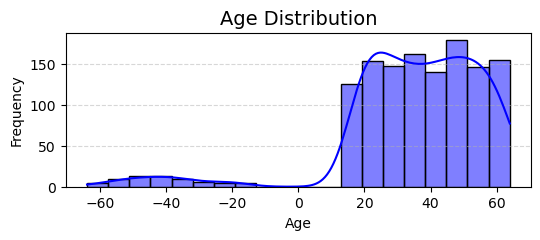

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ploting age distibution
plt.figure(figsize=(6,2))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

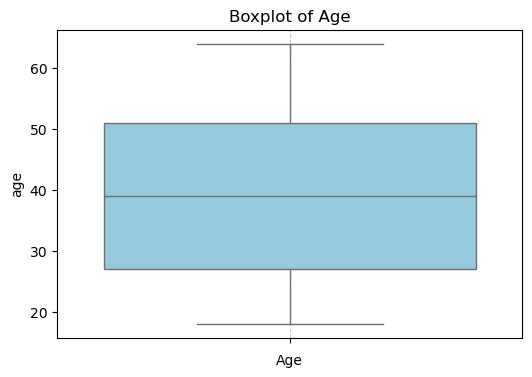

In [30]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(df['age'], color='skyblue')
plt.title('Boxplot of Age', fontsize=12)
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_37076/312208576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette='Set2')


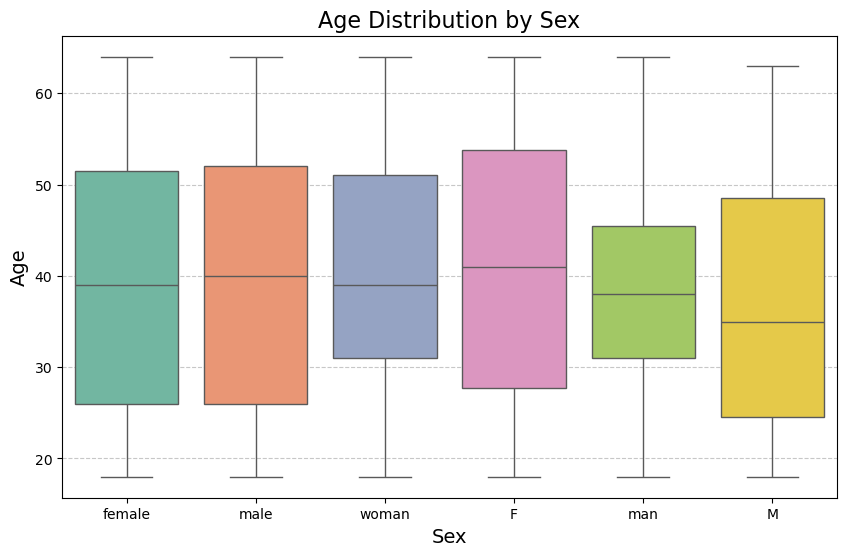

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [32]:
df['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', nan, 'M'], dtype=object)

In [6]:
# Map sex to male and female
sex_mapping = {
    'female': 'Female',
    'woman': 'Female',
    'Woman': 'Female',
    'F': 'Female',
    'f': 'Female',
    'male': 'Male',
    'man': 'Male',
    'Man': 'Male',
    'M': 'Male',
    'm':'Male',
    }

# Appply mapping
df['sex_normalized'] = df['sex'].map(sex_mapping)
df['sex_normalized'].unique()

array(['Female', 'Male', nan], dtype=object)

In [40]:
df['sex_normalized'].isnull().sum()

66

In [10]:
# bmi
df['bmi'].isnull().sum()

66

In [15]:
df['children'] = abs(df['children'])

In [16]:
df.children.unique()

array([ 0.,  1.,  3.,  2., nan,  4.,  5.])

In [20]:
df.smoker.isnull().sum()

66

In [ ]:
# Mising data in each column
df.isnull().sum()

age               66
sex               66
bmi               66
children          66
smoker            66
region            66
charges           54
sex_norm          66
sex_normalized    66
dtype: int64

In [32]:
# Check percentage of Null Values
perc = round(((df.isnull().sum())/len(df) *100),2)

perc.apply(lambda x: f'{x:.2f}%')

age               4.93%
sex               4.93%
bmi               4.93%
children          4.93%
smoker            4.93%
region            4.93%
charges           4.04%
sex_norm          4.93%
sex_normalized    4.93%
dtype: object

In [39]:
# Check for rows that are entirely null
df[df.isnull().all(axis=1)]

,age,sex,bmi,children,smoker,region,charges,sex_norm,sex_normalized
447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.isnull().all(axis=1).sum()

2

In [42]:
# Check for columns that are entirely null
df.columns[df.isnull().all(axis=0)]

Index([], dtype='object')

In [44]:
# Remove rows with entirely empty
df_cleaned_rows = df.dropna(how='all').reset_index(drop=True)
df_cleaned_rows

,age,sex,bmi,children,smoker,region,charges,sex_norm,sex_normalized
0,19.0,female,27.900,0.0,yes,southwest,16884.924,Female,Female
1,18.0,male,33.770,1.0,no,Southeast,1725.5523,Male,Male
2,28.0,male,33.000,3.0,no,southeast,$4449.462,Male,Male
3,33.0,male,22.705,0.0,no,northwest,$21984.47061,Male,Male
4,32.0,male,28.880,0.0,no,northwest,$3866.8552,Male,Male
...,...,...,...,...,...,...,...,...,...
1331,50.0,male,30.970,3.0,no,Northwest,$10600.5483,Male,Male
1332,-18.0,female,31.920,0.0,no,Northeast,2205.9808,Female,Female
1333,18.0,female,36.850,0.0,no,southeast,$1629.8335,Female,Female
1334,21.0,female,25.800,0.0,no,southwest,2007.945,Female,Female


In [47]:
# Check how many columns have mssing values at the same row index as others
df_same_index = df_cleaned_rows.isnull().sum(axis=1)
result = df_same_index[df_same_index > 1].count()
result

125